In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
df = pd.read_excel('/home/usuario/Documents/astronomia-observacional/felipe_occultation/measurements.xlsx')
print(df)

                                                 Label  slice  Saturated  \
0    ct5gxz_2023-07-07T00-19-52.582_Science_Occulta...    803          0   
1    ct5gxz_2023-07-07T00-19-52.782_Science_Occulta...    804          0   
2    ct5gxz_2023-07-07T00-19-52.982_Science_Occulta...    805          0   
3    ct5gxz_2023-07-07T00-19-53.182_Science_Occulta...    806          0   
4    ct5gxz_2023-07-07T00-19-53.382_Science_Occulta...    807          0   
..                                                 ...    ...        ...   
383  ct5gxz_2023-07-07T00-21-10.017_Science_Occulta...   1186          0   
384  ct5gxz_2023-07-07T00-21-10.217_Science_Occulta...   1187          0   
385  ct5gxz_2023-07-07T00-21-10.417_Science_Occulta...   1188          0   
386  ct5gxz_2023-07-07T00-21-10.617_Science_Occulta...   1189          0   
387  ct5gxz_2023-07-07T00-21-10.817_Science_Occulta...   1190          0   

     J.D.-2400000        JD_UTC  JD_SOBS  HJD_UTC  BJD_TDB  AIRMASS  ALT_OBJ  \
0    60

In [9]:
julian_time = df['J.D.-2400000'].tolist()
source_sky1 = df['Source-Sky_T1']
source_sky2 = df['Source-Sky_C2']
source_sky3 = df['Source-Sky_C3']

In [4]:
def julian_to_seconds(julian):
    fraction_day = julian % 1
    seconds = fraction_day * 86400
    return seconds


seconds_after_midnight = [julian_to_seconds(val) for val in julian_time]

print(seconds_after_midnight)

[44392.48104952276, 44392.683052551, 44392.882031807676, 44393.08196157217, 44393.28197746072, 44393.48104347009, 44393.683046498336, 44393.88202575501, 44394.08204164356, 44394.28205753211, 44394.48302392848, 44394.68303981703, 44394.8840062134, 44395.08307222277, 44395.282051479444, 44395.48301787581, 44395.68303376436, 44395.88400016073, 44396.08306554146, 44396.282044798136, 44396.48404782638, 44396.68501422275, 44397.28298862465, 44397.88398742676, 44398.08503994718, 44398.28298257198, 44398.484035092406, 44398.68603812065, 44398.885017377324, 44399.08503389452, 44399.285049783066, 44399.48402903974, 44399.686032067984, 44399.88501132466, 44400.08502721321, 44400.28504310176, 44400.48505899031, 44400.6849887548, 44400.886991783045, 44401.08605779242, 44401.28503704909, 44401.48505293764, 44401.687055965886, 44401.88698573038, 44402.08605111111, 44402.285030367784, 44402.48599676415, 44402.6860126527, 44402.88697904907, 44403.08803219814, 44403.285974194296, 44403.48702734336, 4440

In [10]:
mean_flux23 = (source_sky2 + source_sky3) / 2
ratio = source_sky1 / mean_flux23

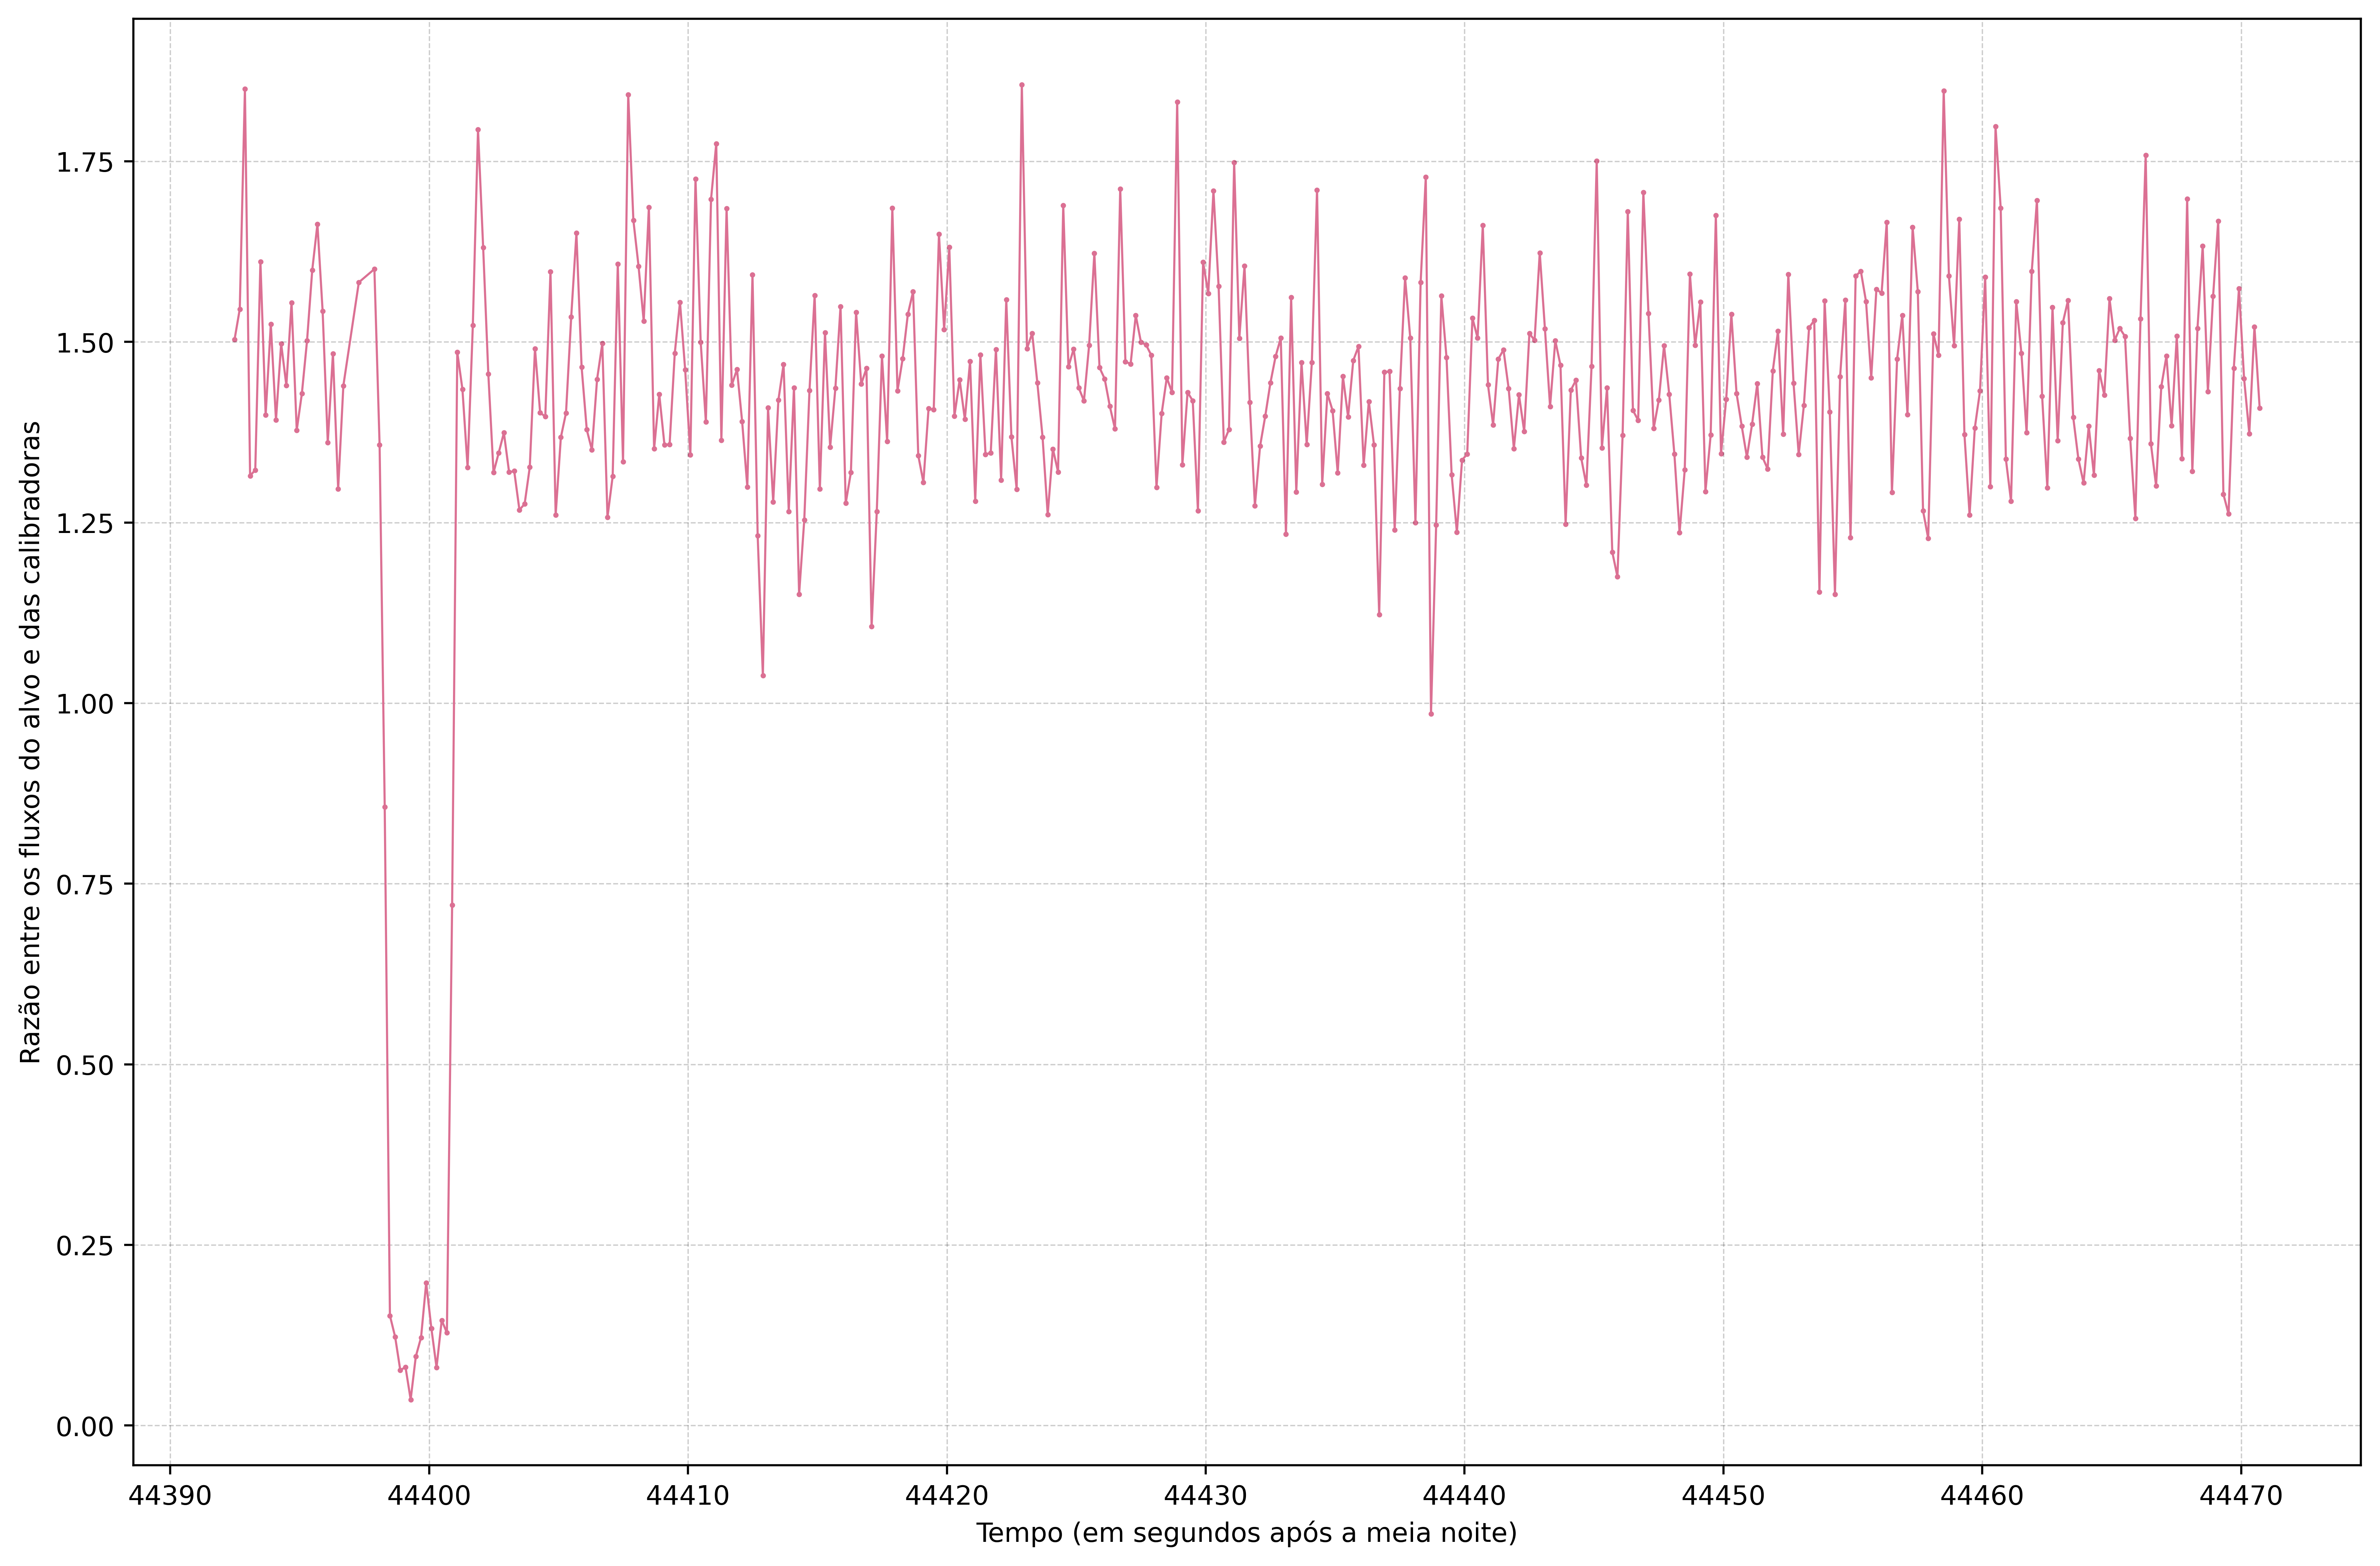

In [11]:
fig, ax = plt.subplots(figsize=(15,10), dpi=500)
plt.scatter(seconds_after_midnight, ratio, s=1, c='palevioletred')
plt.plot(seconds_after_midnight, ratio, linewidth=0.8, c='palevioletred')
plt.xlabel('Tempo (em segundos após a meia noite)')
plt.ylabel('Razão entre os fluxos do alvo e das calibradoras')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, alpha=0.2)